In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information about the dataset
X_train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

X_test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time

## Set Definiton

In [4]:
trainSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")
testSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_test.csv")

In [5]:
trainSet.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [6]:
trainSet.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [7]:
# Some statistics about the data
trainSet.describe()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
count,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06
mean,4.145262e+00,-2.812879e-01,-1.095159e-01,-1.841267e-01,-1.650011e-02,7.171403e-03,-8.201144e-02,3.247712e-02,-8.360838e-02,2.741165e-01,1.915273e-01,1.516496e-01,1.001085e-01,6.424995e+05
std,3.209813e+00,1.695764e+00,1.167686e+00,8.775115e-01,8.064175e-01,1.062984e+00,1.038606e+00,9.362290e-01,9.751777e-01,1.443411e+00,1.683294e+00,7.878988e-01,8.709405e-01,3.709477e+05
min,0.000000e+00,-3.082300e+01,-1.785773e+01,-7.299333e+01,-2.310928e+01,-3.083340e+01,-5.245081e+01,-2.589555e+01,-4.828901e+01,-1.743999e+01,-3.316000e+01,-3.097054e+01,-2.550938e+01,0.000000e+00
25%,1.054690e+00,-4.118489e-01,-3.928434e-01,-5.782370e-01,-2.266108e-01,-3.295574e-01,-1.918623e-01,-2.983937e-01,-4.984175e-01,-4.324075e-01,-4.472183e-01,-1.019181e-01,-2.062900e-01,3.212498e+05
50%,3.945310e+00,0.000000e+00,0.000000e+00,-6.909794e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306061e-04,6.181826e-02,1.402483e-02,6.424995e+05
75%,6.953120e+00,5.008268e-01,2.634242e-01,1.321657e-01,2.444148e-01,2.103091e-01,2.683916e-01,3.880151e-01,3.262901e-01,5.005791e-01,3.508870e-01,4.864241e-01,4.975648e-01,9.637492e+05
max,1.000000e+01,1.634061e+01,2.627623e+01,2.350346e+01,3.467168e+01,1.550696e+01,3.567946e+01,7.271823e+01,2.311835e+01,6.165640e+01,2.773554e+01,2.596499e+01,4.828874e+01,1.284999e+06


This code filters rows in a dataset where a column (`t`) has the value 10, grabs the row numbers, adds 1 to each of them, and combines them with a starting `0`. The result is a list of these modified row numbers. Then, it checks how many items are in the list (`idx.shape`) and finds the smallest and largest values in the `t` column of the original dataset.

In [8]:
idx = np.hstack((0,trainSet[trainSet.t ==10].index.values +1))
idx.shape, trainSet.t.min(), trainSet.t.max()

((4054,), np.float64(0.0), np.float64(10.0))

This code randomly selects an index (`k`) from the `idx` list, then creates a range of values starting from the selected index to plot a slice of data from the dataset columns (`x_1`, `y_1`, `x_2`, `y_2`, etc.). It plots three different sets of data (`x_1/y_1`, `x_2/y_2`, and `x_3/y_3`) over this range, and highlights a single point from each set at the selected index with square markers. The overall goal is to visualize parts of the data series, focusing on a specific point marked with squares.

61


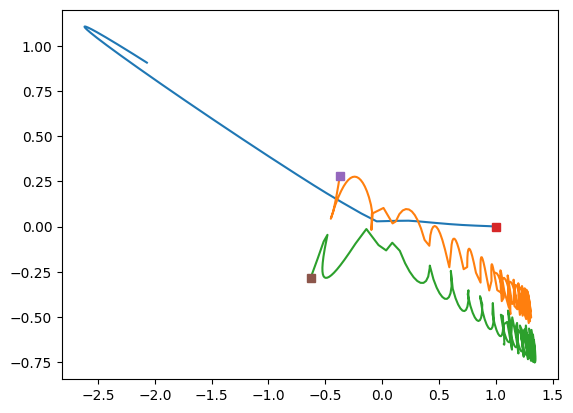

In [9]:
k = np.random.randint(idx.shape[0])
print(k)
pltidx = range(idx[k] , 257+idx[k])
pltsquare = idx[k]
plt.plot(trainSet.x_1[pltidx], trainSet.y_1[pltidx])
plt.plot(trainSet.x_2[pltidx], trainSet.y_2[pltidx])
plt.plot(trainSet.x_3[pltidx], trainSet.y_3[pltidx])

plt.plot(trainSet.x_1[pltsquare], trainSet.y_1[pltsquare], 's')
plt.plot(trainSet.x_2[pltsquare], trainSet.y_2[pltsquare], 's')
plt.plot(trainSet.x_3[pltsquare], trainSet.y_3[pltsquare], 's')

In [10]:
#trajectory id column
trainSet['trajectory_id'] = trainSet['Id'] // 257
trainSet.head(100)

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.710940,-0.235060,-0.834473,0.646884,-0.743364,-0.677753,-0.523852,-0.719044,0.577407,0.912813,1.358325,0.072161,0.165957,95,0
96,3.750000,-0.211691,-0.862009,0.553654,-0.668926,-0.703803,-0.502593,-0.618749,0.513463,0.915494,1.364602,0.065096,0.155463,96,0
97,3.789060,-0.191557,-0.886887,0.479731,-0.606433,-0.726343,-0.483585,-0.537844,0.461332,0.917900,1.370472,0.058113,0.145101,97,0
98,3.828120,-0.174048,-0.909491,0.418457,-0.552040,-0.745987,-0.466448,-0.469662,0.417181,0.920035,1.375940,0.051205,0.134859,98,0


In [11]:
# Clean rows with 0's in any column
cleanSet = trainSet.loc[(trainSet.drop(columns='trajectory_id') != 0).all(axis=1)]

In [12]:
cleanSet.head(100)

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0
5,0.195312,0.988650,0.002321,-0.116689,0.023888,-0.261282,0.848781,0.053344,-0.107057,-0.727368,-0.851102,0.063344,0.083169,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.750000,-0.211691,-0.862009,0.553654,-0.668926,-0.703803,-0.502593,-0.618749,0.513463,0.915494,1.364602,0.065096,0.155463,96,0
97,3.789060,-0.191557,-0.886887,0.479731,-0.606433,-0.726343,-0.483585,-0.537844,0.461332,0.917900,1.370472,0.058113,0.145101,97,0
98,3.828120,-0.174048,-0.909491,0.418457,-0.552040,-0.745987,-0.466448,-0.469662,0.417181,0.920035,1.375940,0.051205,0.134859,98,0
99,3.867190,-0.158751,-0.930090,0.366008,-0.503451,-0.763151,-0.450919,-0.410372,0.378721,0.921901,1.381010,0.044364,0.124730,99,0


In [13]:
# Get the shape of the entire dataset, which returns (rows, columns)
shape = cleanSet.shape

# Print the number of rows from the shape
print("Number of rows in cleanSet:", shape[0])

Number of rows in cleanSet: 1084792


## Data Spliting

In [14]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    # Combine features and targets
    data = np.hstack((X, y))
    
    # Set a random seed
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data
    np.random.shuffle(data)
    
    # Determine the split index based on the test size
    split_idx = int(len(data) * (1 - test_size))
    
    # Split the data back into features and target
    X_train, y_train = data[:split_idx, :-y.shape[1]], data[:split_idx, -y.shape[1]:]
    X_test, y_test = data[split_idx:, :-y.shape[1]], data[split_idx:, -y.shape[1]:]
    
    return X_train, X_test, y_train, y_test

With this, while inputing the clean set of values, the test and the train resuts will be given.

In [33]:
X = cleanSet[['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2','v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3']].values
y = cleanSet[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].values

# Apply the custom train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (867833, 13), X_test shape: (216959, 13)
y_train shape: (867833, 6), y_test shape: (216959, 6)


## Assessing the Model Accuracy

In [28]:
def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

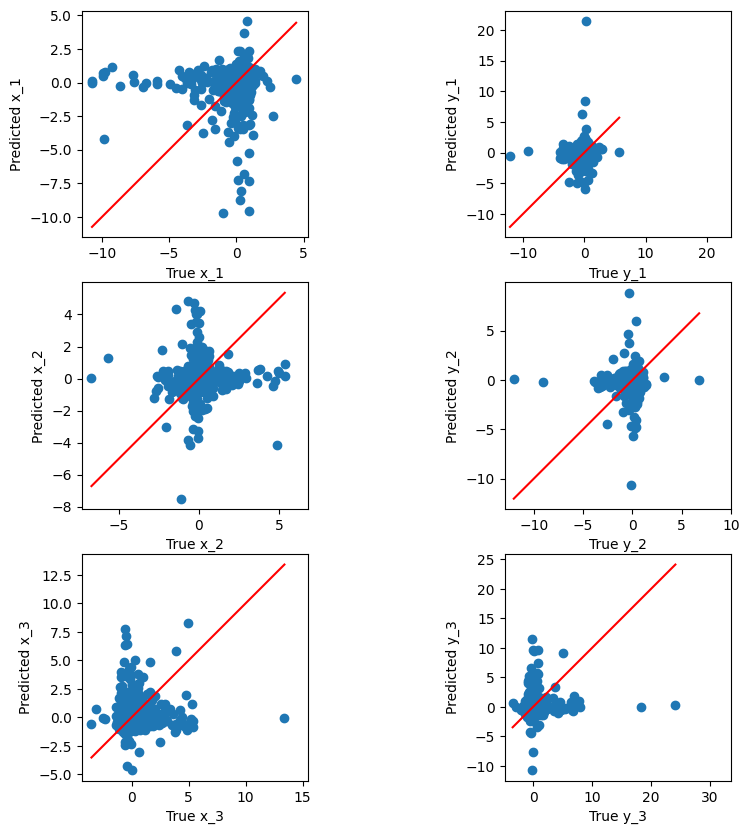

In [34]:
plot_y_yhat(y_test, y_train)